<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
4143,43,17800.0,3,150,3.5,3,1,2007,0
4852,59,7450.0,1,68,1.2,3,1,2009,0
2944,77,12500.0,3,128,2.0,3,1,2007,0
2123,77,17500.0,3,76,1.8,3,1,2012,0
536,74,19000.0,0,263,4.2,0,1,2001,1
5389,57,6800.0,4,185,1.8,3,1,2005,0
4357,33,6500.0,3,150,1.4,3,1,2008,0
8320,4,9999.0,3,190,3.0,3,1,2007,1
3477,12,8500.0,1,124,1.6,1,1,2010,0
6441,5,2800.0,3,300,1.8,2,1,1987,2


In [4]:
df.isnull().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

In [37]:
df['price'].describe()

count      8495.000000
mean      16185.453305
std       24449.641512
min         259.350000
25%        5490.000000
50%        9500.000000
75%       17145.600000
max      547800.000000
Name: price, dtype: float64

In [135]:
df['price'].value_counts()

8500.000      86
6500.000      80
7500.000      76
10500.000     75
3500.000      75
5500.000      73
9500.000      68
12500.000     67
11500.000     66
7000.000      66
8900.000      59
4000.000      57
8000.000      56
6900.000      54
4500.000      54
2500.000      52
3000.000      51
9000.000      50
5000.000      49
7700.000      49
8200.000      48
10900.000     48
8800.000      48
7300.000      47
6700.000      46
11900.000     45
7200.000      45
7900.000      44
9200.000      44
8700.000      44
              ..
537.225        1
27768.975      1
48535.500      1
10199.000      1
115500.000     1
66346.000      1
6199.000       1
10150.000      1
18932.550      1
2778.750       1
547800.000     1
17250.000      1
45900.000      1
90999.000      1
5420.000       1
13566.000      1
86000.000      1
833.625        1
62900.000      1
8260.000       1
70500.000      1
115555.000     1
40755.000      1
17835.000      1
42741.621      1
20120.000      1
87200.000      1
6061.380      

I will create a age dataframe and subtract it from 2016 since that is the year the data is from and the cars were sold in.

In [0]:
df['age'] = 2016 - df['year']

In [137]:
df.shape

(8495, 10)

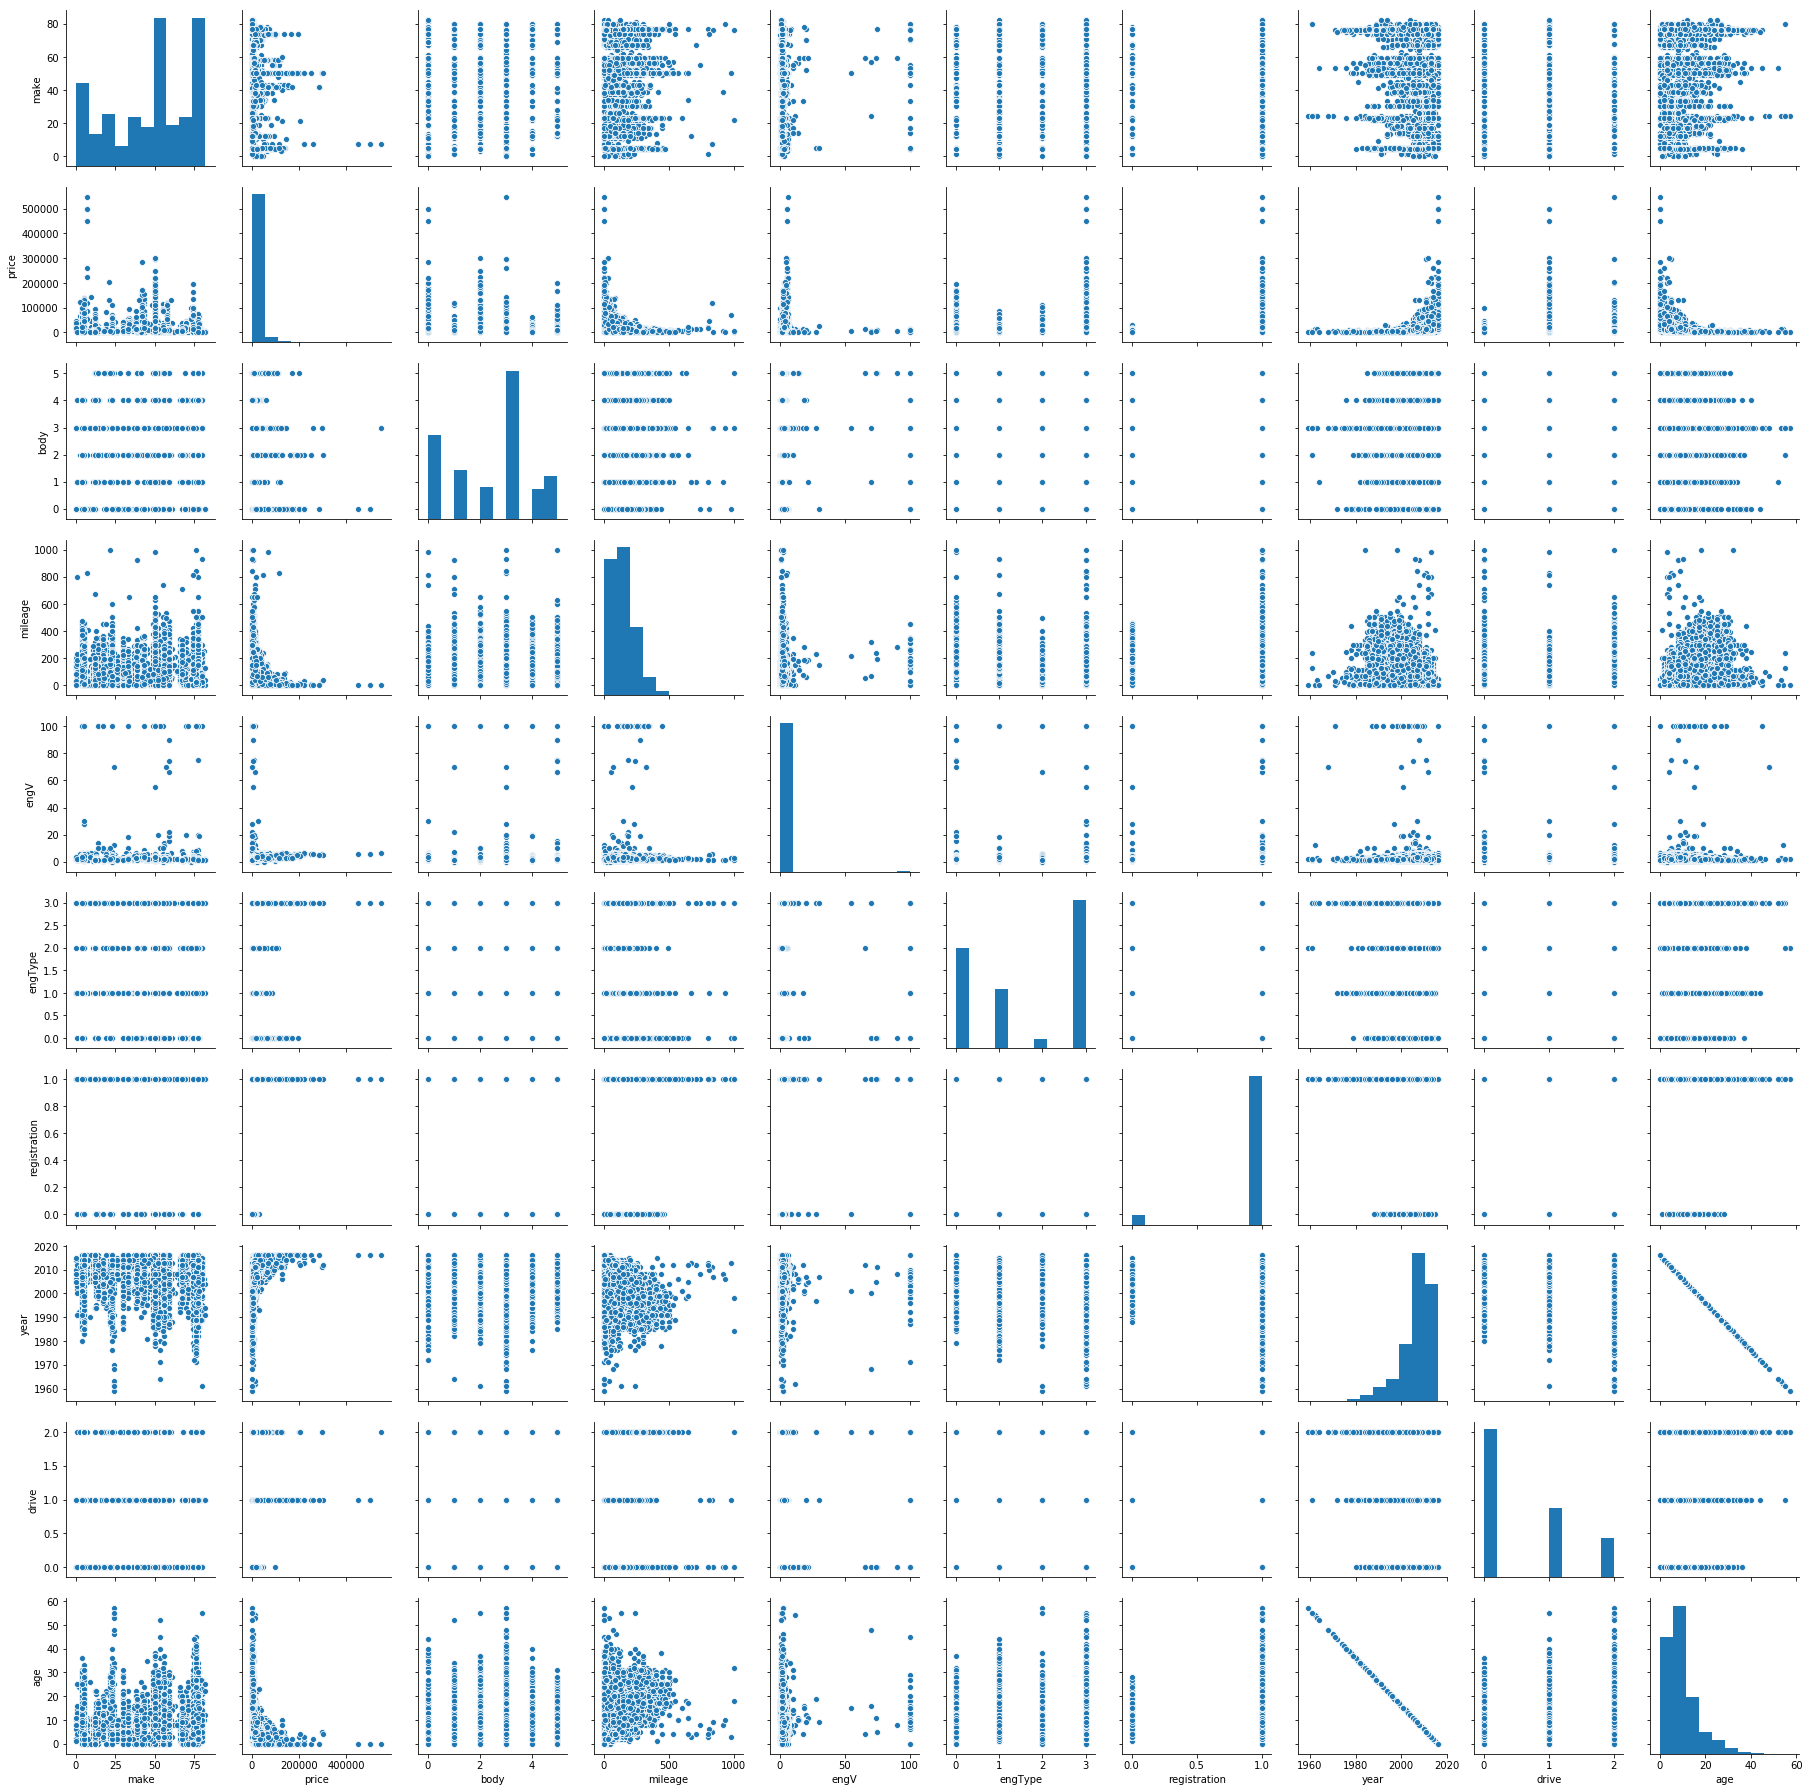

In [138]:
sns.pairplot(df)

# Predictive Modeling with Linear Regression

###I would use this as baseline model###

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [68]:
df.columns.tolist()

['make',
 'price',
 'body',
 'mileage',
 'engV',
 'engType',
 'registration',
 'year',
 'drive',
 'age']

In [0]:
target = 'price'
features = ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'age', 'drive']

X = df[features]
y = df[target]

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6796, 8), (1699, 8), (6796,), (1699,))

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

- here's where we decide what features to use, I will use a .corr()


In [140]:
df.corr()

,make,price,body,mileage,engV,engType,registration,year,drive,age
make,1.000000,-0.083205,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,0.013833
price,-0.083205,1.000000,-0.253726,-0.336940,0.066226,-0.021051,0.124062,0.393562,0.221952,-0.393562
body,0.026127,-0.253726,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,0.154554
mileage,-0.035097,-0.336940,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,0.503135
engV,-0.021246,0.066226,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,0.041076
engType,-0.011880,-0.021051,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,0.040471
registration,0.104557,0.124062,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,-0.185104
year,-0.013833,0.393562,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,-1.000000
drive,-0.196444,0.221952,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,0.169709
age,0.013833,-0.393562,0.154554,0.503135,0.041076,0.040471,-0.185104,-1.000000,0.169709,1.000000


seems like price, year, drive and mileage makes a huge difference. So does body but I might use it later. 

###Using Age and all the features###
- as evident, age of the car has a corr with the price, I am going to choose age instead of year 

In [0]:
model = LinearRegression()

model.fit(X_train, y_train) #Always fit the model on training data

predictions = model.predict(X_test)


## 1.4 Report the Intercept and Coefficients for the fitted model.

In [62]:
print('Coefficients for the model are:', (pd.Series(model.coef_, features)))
print('Intercept for the model is:', model.intercept_)


Coefficients for the model are: make             -35.167266
body           -1770.985091
mileage          -40.268597
engV             273.035408
engType        -1111.080317
registration    4535.060134
age            -1140.731248
drive           8292.046139
dtype: float64
Intercept for the model is: 30359.11806178926


## 1.5 Use the test data to make predictions.

In [53]:
model.predict(X_test)

array([19200.26639279,  5355.00284406, 26205.12415048, ...,
       29728.80723151,  8920.98307381, 14092.87146182])

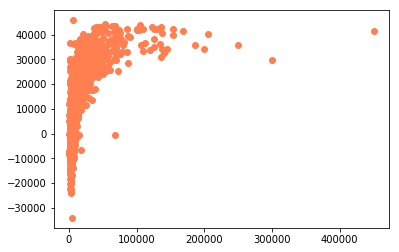

In [54]:
plt.scatter(y_test, predictions, color = 'coral')

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [55]:
print('Root Mean^2 Error is: ', np.sqrt(mean_squared_error(y_true = y, y_pred = model.predict(X))))

Root Mean^2 Error is:  20671.832839230603


In [56]:
print("R Square score is:", r2_score(y, model.predict(X)))

R Square score is: 0.2850690409520623


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?




Instead of using year, I used age by subtracting the production year from 2016, which is essentially the same thing. For this model where I used all the features, the coefficient for age is -1140, which shows that as the age of the car goes up by 1 year, the price of the car goes down by $1140.

## 1.8 How should we interpret the Root Mean Square Error?
That is the difference in the predicted price of a car, it shows how much would we be off by using the current model. 

## 1.9 How should we interpret the $R^2$?

R2 shows how well is the y value i.e. price is represented by the features we used. Ideally , we would like to have a higher R square value to shows that the features that we are using are representing the price for the car well. Here, only 28.5% of the dependent variable i.e. price is explained by the model. (horrible). 

In [147]:
df.corr()

,make,price,body,mileage,engV,engType,registration,year,drive,age
make,1.000000,-0.083205,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,0.013833
price,-0.083205,1.000000,-0.253726,-0.336940,0.066226,-0.021051,0.124062,0.393562,0.221952,-0.393562
body,0.026127,-0.253726,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,0.154554
mileage,-0.035097,-0.336940,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,0.503135
engV,-0.021246,0.066226,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,0.041076
engType,-0.011880,-0.021051,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,0.040471
registration,0.104557,0.124062,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,-0.185104
year,-0.013833,0.393562,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,-1.000000
drive,-0.196444,0.221952,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,0.169709
age,0.013833,-0.393562,0.154554,0.503135,0.041076,0.040471,-0.185104,-1.000000,0.169709,1.000000


###Using different features###

In [156]:
df['body'].value_counts()

3    3267
0    1858
1    1088
5     935
2     697
4     650
Name: body, dtype: int64

In [0]:
target = 'price'
features = ['mileage', 'age', 'body']

y = df[target]
X = df[features]


In [158]:
run_linear_model(X,y)

Root Mean Squared Error 22640.300019145252
R^2 Score 0.20729019343352595
Intercept 36490.70155319084
mileage     -33.937205
age       -1040.555797
body      -2505.229669


In [0]:
target = 'price'
features = ['year', 'drive', 'registration', 'engV']

y = df[target]
X = df[features]

In [162]:
run_linear_model(X, y)

Root Mean Squared Error 22006.33728854992
R^2 Score 0.2510627948105849
Intercept -3058012.6141413464
year            1526.077258
drive           9498.852453
registration    6168.454156
engV             265.160567


Using all the features leads to the lowest RMSE and highest R^2 score. Our goal here is to lower the RMSE. I want to remove all the 'high valued prices' from the training dataset to see how that impacts the RMSE.

In [164]:
df['price'].describe()

count      8495.000000
mean      16185.453305
std       24449.641512
min         259.350000
25%        5490.000000
50%        9500.000000
75%       17145.600000
max      547800.000000
Name: price, dtype: float64

In [0]:
train = df.query('price < 100000')
test = df.query('259 <= price <= 547800')

In [0]:
target = 'price'
features = ['mileage', 'year']

X = df[features]
y = df[target]

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]


In [216]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8366, 2), (8495, 2), (8366,), (8495,))

In [217]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([19247.59526216, 17141.55863896, 15671.26962222, ...,
       14406.00626523, 15249.51516989, 16624.51074238])

In [218]:
print('Coefficients for the model are:', (pd.Series(model.coef_, features)))
print('Intercept for the model is:', model.intercept_)
print('Root Mean^2 Error is: ', np.sqrt(mean_squared_error(y_true = y, y_pred = model.predict(X))))
print("R Square score is:", r2_score(y, model.predict(X)))

Coefficients for the model are: mileage    -28.116963
year       846.244543
dtype: float64
Intercept for the model is: -1679791.982855962
Root Mean^2 Error is:  22398.539474332603
R Square score is: 0.16064528164425684


Nope. Even trying to use the data to be trained on cars sold for less than $10000, the RMSE error is high.

In [219]:
df['mileage'].describe()

count    8495.000000
mean      141.744202
std        97.464062
min         0.000000
25%        74.000000
50%       130.000000
75%       197.000000
max       999.000000
Name: mileage, dtype: float64

In [241]:
df.columns.tolist()

['make',
 'price',
 'body',
 'mileage',
 'engV',
 'engType',
 'registration',
 'year',
 'drive',
 'age']

In [0]:
train = df.query('10 <=mileage <= 150')
test = df.query('0 <= mileage <= 1000')

In [0]:
target = 'price'
features = ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'age', 'drive']


X = df[features]
y = df[target]

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]


In [263]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4399, 8), (8495, 8), (4399,), (8495,))

In [264]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([30939.86262014, 28007.8291489 , 29215.70181819, ...,
       13984.09962015,  5794.95292863, 23950.43550038])

In [265]:
print('Coefficients for the model are:', (pd.Series(model.coef_, features)))
print('Intercept for the model is:', model.intercept_)
print('Root Mean^2 Error is: ', np.sqrt(mean_squared_error(y_true = y, y_pred = model.predict(X))))
print("R Square score is:", r2_score(y, model.predict(X)))

Coefficients for the model are: make              -27.425110
body             -927.990309
mileage          -107.761527
engV              583.147431
engType         -1121.010933
registration     6192.128402
age             -1243.559770
drive           11072.019221
dtype: float64
Intercept for the model is: 28758.77735238344
Root Mean^2 Error is:  22612.123296086847
R Square score is: 0.1445614360128441


#Both with trying to train on different mileage and price would not lower the RMSE for the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])


## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [0]:
target = 'ln_price'
features = ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
           'age', 'drive']

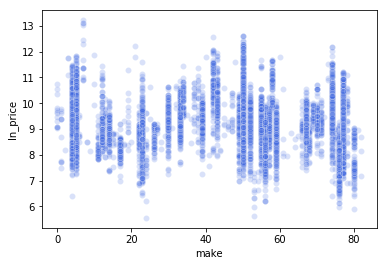

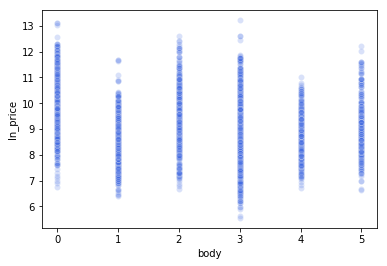

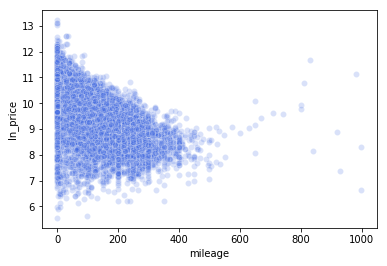

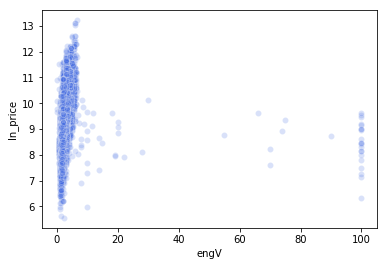

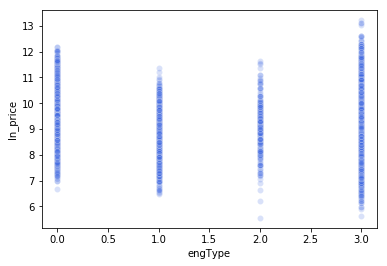

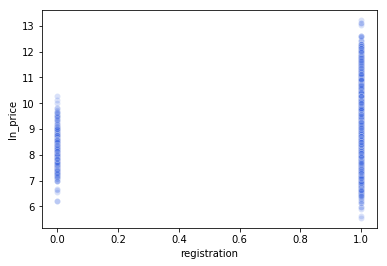

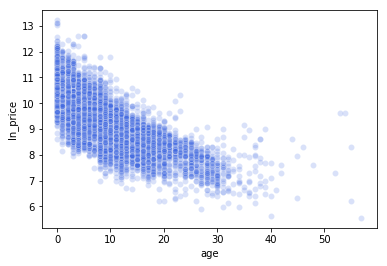

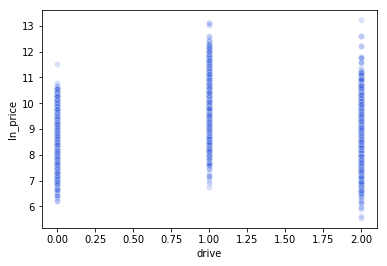

In [270]:
for feature in features:
  sns.scatterplot(x = feature, y = target, data = df, alpha = 0.2, color = 'royalblue')
  plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
df['engType_SQ'] = df['engType']**2

In [0]:
df['body_SQ'] = df['body'] ** 2

In [0]:
df['age_SQ'] = df['age'] **2
df['mileage_SQ'] = df['mileage'] **2


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

#Creating a baseline first#

In [275]:
def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)

Root Mean Squared Error 21394.43524600267
R^2 Score 0.292133223737432
Intercept 30359.11806178926
make             -35.167266
body           -1770.985091
mileage          -40.268597
engV             273.035408
engType        -1111.080317
registration    4535.060134
age            -1140.731248
drive           8292.046139


In [286]:
df.columns.tolist()

['make',
 'price',
 'body',
 'mileage',
 'engV',
 'engType',
 'registration',
 'year',
 'drive',
 'age',
 'ln_price',
 'engType_SQ',
 'body_SQ',
 'age_SQ',
 'mileage_SQ',
 'engV_SQ']

In [285]:
target = 'ln_price'
features = ['age', 'mileage', 'make', 'drive', 'registration', 'engType',
           'engV', 'body']
X = df[features]
y = df[target]

run_linear_model(X,y)

Root Mean Squared Error 0.5845598209790621
R^2 Score 0.6434442979521502
Intercept 9.538481844961979
age            -0.095518
mileage        -0.000030
make           -0.001527
drive           0.389876
registration    0.731811
engType        -0.058022
engV            0.008703
body           -0.093551


###Polynomial features are not helping in this case because right now, we have a root mean squared error of 58% but using the polynomial features increase the RMSE to 60%+:

###Now, I use the polynmial features###

In [284]:
target = 'ln_price'
features = ['age_SQ', 'mileage_SQ', 'make', 'body',  'drive', 'registration', 'engType',
           'engV']

X = df[features]
y=df[target]

run_linear_model(X,y)

Root Mean Squared Error 0.687695530841253
R^2 Score 0.5065287364146577
Intercept 8.897247485281909
age_SQ         -0.002504
mileage_SQ     -0.000002
make           -0.001516
body           -0.115475
drive           0.383630
registration    0.955161
engType        -0.076163
engV            0.008497


In [0]:
df['engV_SQ'] = df['engV']**2

In [281]:
target = 'ln_price'
features = ['age_SQ', 'mileage_SQ', 'make', 'body',  'drive', 
            'registration', 'engType']

X = df[features]
y=df[target]

run_linear_model(X,y)

Root Mean Squared Error 0.6901172561968848
R^2 Score 0.5030470908025797
Intercept 8.918738144776473
age_SQ         -0.002499
mileage_SQ     -0.000002
make           -0.001537
body           -0.116212
drive           0.387920
registration    0.954160
engType        -0.076324


In [0]:
['age', 'mileage', 'make', 'body', 'drive', 'registration', 'engType',
           'engV', 'body']

In [293]:
target = 'ln_price'
feature = ['age', 'mileage', 'engType_SQ', 'make',
           'body_SQ', 'drive', 'registration', '']

X = df[feature]
y = df[target]

run_linear_model(X,y)

Root Mean Squared Error 0.6168938889179161
R^2 Score 0.6029086749015955
Intercept 10.143623396898247
age          -0.100801
mileage      -0.000288
engType_SQ   -0.012035
make         -0.000631
body_SQ      -0.014885
drive         0.413037


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?



In log-linear Regression, the coefficients represent a percentage. For example, in  the last regression, the drive of car increases the price by roughly 38%. We are still off by 69% in our predictions and the prices are only 50% accounted for  by the features we are using. (horrible model or data -_-)

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [117]:
df.columns.tolist()

['make',
 'price',
 'body',
 'mileage',
 'engV',
 'engType',
 'registration',
 'year',
 'drive',
 'ln_price',
 'age',
 'age_SQ',
 'mileage_SQ',
 'engV_SQ']

Without engineering an interaction term

In [119]:
target = 'ln_price'
features = ['make', 'mileage', 'body', 'age', 'registration']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6796, 5), (1699, 5), (6796,), (1699,))

In [120]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)


R^2 0.9941784646762818


##engineering an interaction term##

In [0]:
df.loc[0, 'price'] = 35000

df_X = df.drop(columns = 'price')
df_y = df['price']

df

In [302]:
df['mileage * year'] = df['mileage'] * df['year']

df_X = df.drop(columns = ['price', 'mileage_SQ', 'ln_price', 'body_SQ', 'age_SQ',
                         'mileage_SQ', 'engV_SQ'])
df_y = df['price']
df.head(2)

,make,price,body,mileage,engV,engType,registration,year,drive,age,ln_price,engType_SQ,body_SQ,age_SQ,mileage_SQ,engV_SQ,mileage * year
0,23,35000.0,0,68,2.5,1,1,2010,1,6,9.648595,1,0,36,4624,6.25,136680
1,50,20500.0,3,173,1.8,1,1,2011,2,5,9.928180,1,9,25,29929,3.24,347903


In [303]:
lr = LinearRegression()
lr.fit(df_X, df_y)
print('R^2', lr.score(df_X, df_y))
print('Intercept \t', lr.intercept_)
coefficients = pd.Series(lr.coef_, df_X.columns)
print(coefficients.to_string())

R^2 0.3262119881138673
Intercept 	 -1723128.889793952
make                -26.661474
body              -1762.100152
mileage           11090.490158
engV                291.344600
engType           -9251.944116
registration       5863.703827
year                873.677373
drive              7987.774813
age                -873.677373
engType_SQ         2499.224351
mileage * year       -5.558613


In [304]:
tree = DecisionTreeRegressor()
tree.fit(df_X, df_y)
print('R^2', tree.score(df_X, df_y))

R^2 0.9954250378054778


I like Decision tree better anyway

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [121]:
print('R^2', tree.score(X_train, y_train))

R^2 0.9941784646762818


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
y = df['ln_price']
X = df[['make',
 'body',
 'mileage',
 'engType',
 'registration',
 'drive',
 'age_SQ',
 'mileage_SQ',
 'engV_SQ']]

In [131]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 5.576e+04
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:31:10   Log-Likelihood:                -16785.
No. Observations:                8495   AIC:                         3.359e+04
Df Residuals:                    8486   BIC:                         3.365e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make             0.0194      0.001     21.385   

In [0]:
def viztree(decision_tree, feature_names):
    """Visualize a decision tree"""
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)


def viz3D(fitted_model, df, feature1, feature2, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    return fig

In [0]:
viztree(tree, feature_names = df_X.columns)

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const         11.538843
age            1.415122
mileage        1.524745
engType_SQ     1.138713
make           1.048109
body_SQ        1.172487
drive          1.107445
dtype: float64

No, none of the features have a VIF larger than 10 so none need to be dropped from the model. If it was greater than 10, it would show that the two features are highly correlated. (Initially, I had both EngV feature and the polynomial feature of EngV_SQ and it gave a high VIF for engV_SQ)